In [1]:
import math
import time
import collections
from tqdm import tqdm_notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn import model_selection
from sklearn import datasets, metrics, neighbors
from scipy import optimize

%matplotlib inline

In [2]:
sample_1_x = sts.uniform.rvs(0, 10, 500)
sample_1_y = 1 + 0.5 * sample_1_x + sts.norm.rvs(0, 0.2**0.5, size=500)

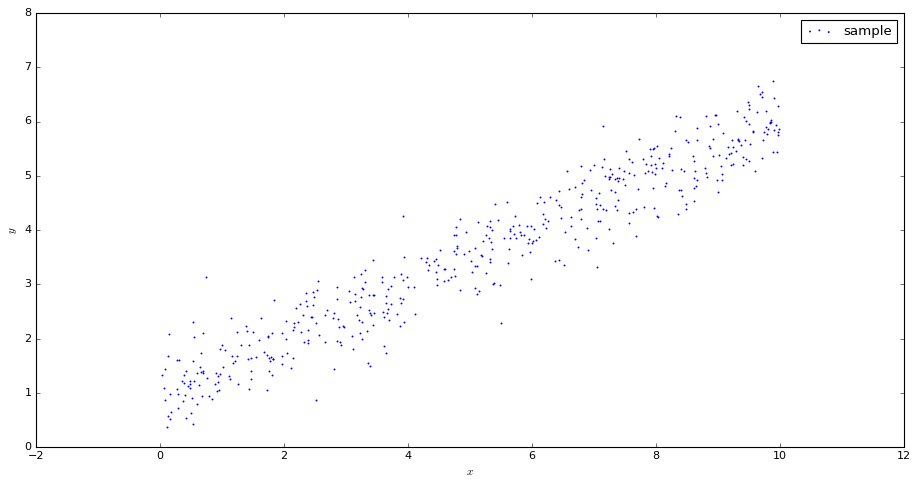

In [3]:
plt.figure(figsize=(14, 7))
plt.scatter(sample_1_x, sample_1_y, s=3, linewidths=0, label='sample')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

In [4]:
def get_mse(sample_x, sample_y):
    def mse(params):
        return ((sample_y - (params[0] * sample_x + params[1])) ** 2).mean()
    return mse

def get_mae(sample_x, sample_y):
    def mae(params):
        return np.abs(sample_y - (params[0] * sample_x + params[1])).mean()
    return mae

In [5]:
estimated_params_1 = optimize.minimize(get_mse(sample_1_x, sample_1_y), (0, 0)).x

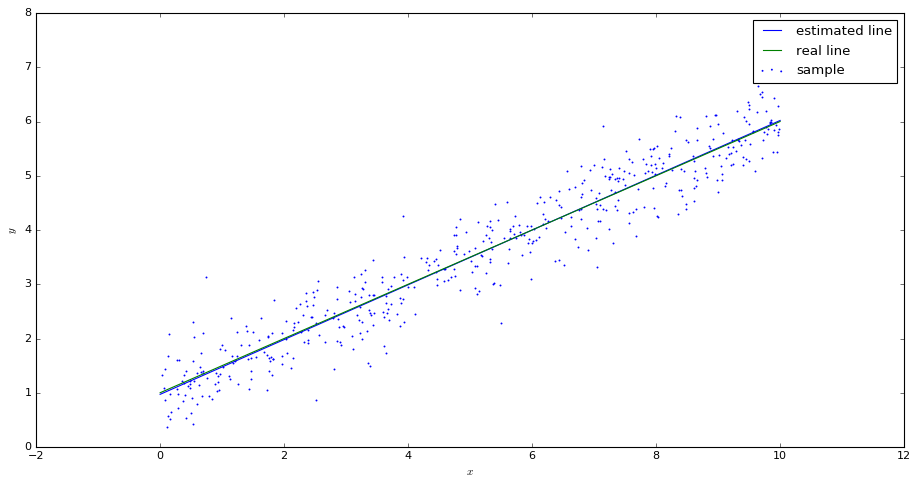

In [6]:
plt.figure(figsize=(14, 7))
plt.scatter(sample_1_x, sample_1_y, s=3, linewidths=0, label='sample')
plt.plot(np.array([0, 10]), estimated_params_1[0] * np.array([0, 10]) + estimated_params_1[1], 
        label='estimated line')
plt.plot(np.array([0, 10]), 0.5 * np.array([0, 10]) + 1, label='real line')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

In [7]:
sample_2_x = np.random.choice(sample_1_x, 75)
sample_2_y = -1 + sts.norm.rvs(0, 0.2**0.5, size=75)

In [8]:
estimated_params_2_mse = optimize.minimize(
    get_mse(np.append(sample_1_x, sample_2_x), np.append(sample_1_y, sample_2_y)), (0, 0)).x
estimated_params_2_mae = optimize.minimize(
    get_mae(np.append(sample_1_x, sample_2_x), np.append(sample_1_y, sample_2_y)), (0, 0)).x

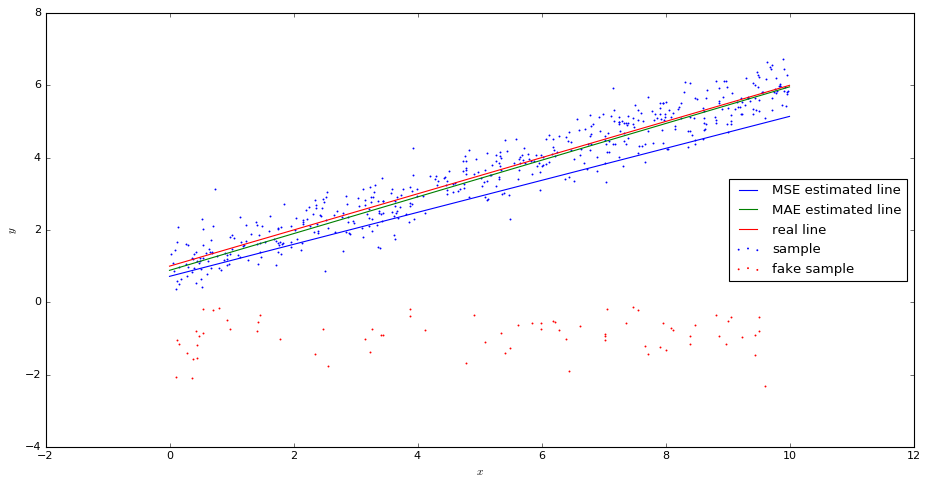

In [9]:
plt.figure(figsize=(14, 7))
plt.scatter(sample_1_x, sample_1_y, s=3, linewidths=0, label='sample')
plt.scatter(sample_2_x, sample_2_y, s=3, c='red', linewidths=0, label='fake sample')
plt.plot(np.array([0, 10]), estimated_params_2_mse[0] * np.array([0, 10]) + estimated_params_2_mse[1], 
        label='MSE estimated line')
plt.plot(np.array([0, 10]), estimated_params_2_mae[0] * np.array([0, 10]) + estimated_params_2_mae[1], 
        label='MAE estimated line')
plt.plot(np.array([0, 10]), 0.5 * np.array([0, 10]) + 1, label='real line')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc=5)

Модель, оптимизирующая MAE, устойчивей модели, оптимизирующей MSE.